<div style="text-align: center; margin: 5px;">
    <h1 style="color: #07004c; font-size: 30px; font-family: Calibri; line-height: 1;">
        <strong>Analyse Approfondie des Prix Immobiliers : </strong><br>
               Défis et Solutions en Modélisation Statistique 🏡📈
    </h1>
    <p style="text-align: center; color: #07004c; font-size: 18px; font-family: Calibri;">
        <em> LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data</em>
    </p>
</div>

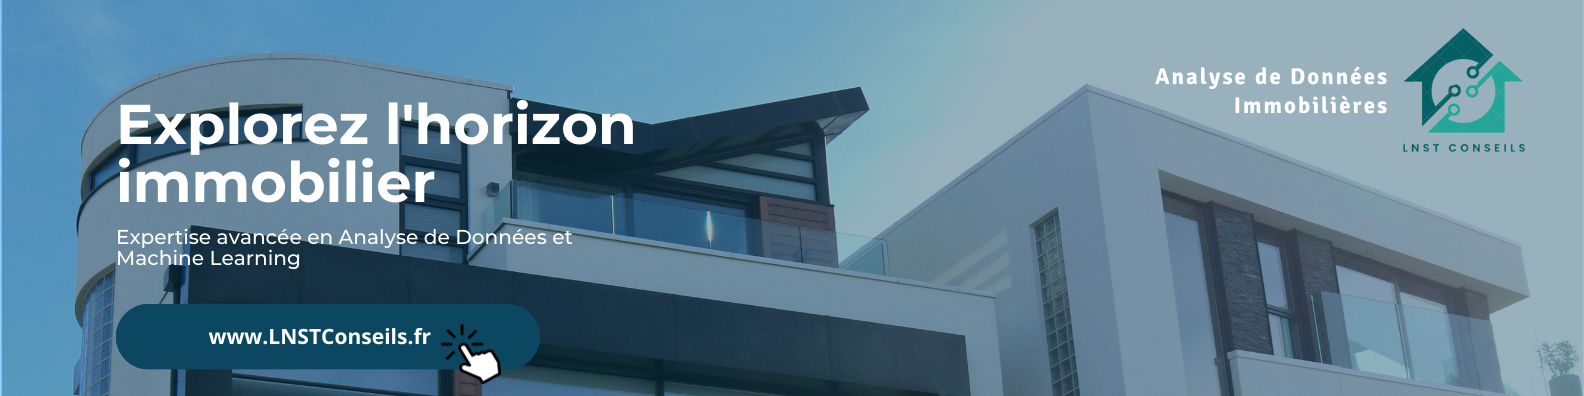

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

<div style="text-align: center; margin: 5px;">
    <h1 style="color: #07004c; font-size: 30px; font-family: Calibri; line-height: 1;">
        <strong> Etape 2 - Intégration de données externes 🕵️‍♀️📈
 </strong>
    </h1>
  
</div>

1. [Introduction](#introduction)
1. [Intégration de données externes](#integr_d_externes)
    1. [Taux d'inflation aus Etats-Unis à partir de 1960](#taux_inflation)
      1. [Traitement des valeurs manquantes](#valeur_manquante)
      1. [Statistiques descriptives](#stat_desc)
    1. [Taux de criminalité aux Etats-Unis de 2000 à 2017](#taux_criminalité)
      1. [Traitement des valeurs manquantes](#valeur_manquante2)
      1. [Statistiques descriptives](#stat_desc2)
    1. [Indice de prix](#indice_prix)
      1. [Traitement des valeurs manquantes](#valeur_manquante3)
      1. [Statistiques descriptives](#stat_desc3)
    1. [Coordonnées](#coordonnée)

    

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.
<br><br/>
- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.
<br><br/>
- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.
<br><br/>
- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

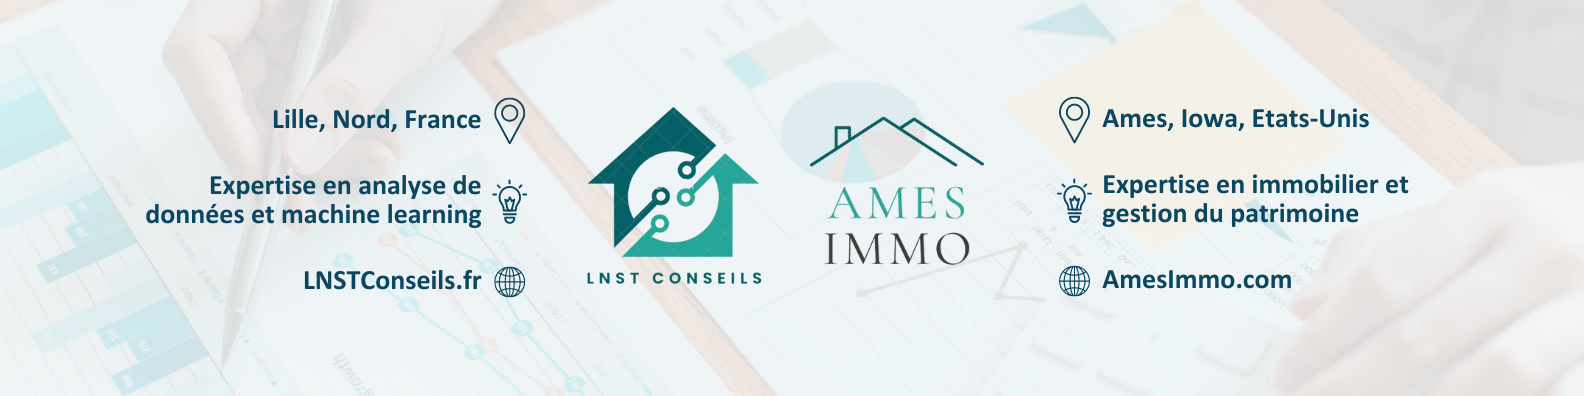

📝 **Comment naviguer dans ce notebook :**

Dans ce notebook, vous pouvez naviguer efficacement en suivant ces étapes simples :

- **Consultez les _définitions statistiques_ (📚) :** Les définitions sont données de manière fonctionnelle pour clarifier les concepts clés utilisés dans l'analyse. Comprendre ces définitions est crucial pour une bonne interprétation des résultats statistiques et pour une application appropriée des techniques d'analyse des données.
<br><br/>
- **Lisez attentivement les _observations_ (💡) :** Ces remarques expliquent les décisions statistiques ou fonctionnelles prises tout au long de l'étude. Elles éclairent sur les raisons pour lesquelles certaines approches ont été privilégiées et guident l'utilisateur dans le processus d'analyse en clarifiant des points spécifiques.
<br><br/>
- **Analysez les _interprétations_ (⚙️) :** Les observations fournissent des interprétations et des réflexions sur les résultats obtenus. Elles permettent de tirer des conclusions significatives et d'identifier des tendances ou des phénomènes intéressants dans les données analysées.


# Partie 2 - Intégration de données externes <a class="anchor"  id="integr_d_externes"></a>
-----------------

In [ ]:
# Importation des bibliothèques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
data_etape1 = pd.read_csv('df_merged.csv', sep = ',')
data_etape1.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,typeVente,superficieSolarium,typeRouteAcces,nbPieces,superficieTotaleSousSol,utilites,superficieTerrasseBois,anneeConstruction,anneeRenovation,anneeVente
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,79.525002,AllPub,0.000000,2003,2003,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,117.243636,AllPub,27.685106,1976,1976,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,85.470797,AllPub,0.000000,2001,2002,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,70.234698,AllPub,0.000000,1915,1970,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,106.373981,AllPub,17.837384,2000,2000,2008


In [ ]:
data_etape1.shape

(2903, 81)

In [ ]:
VM = data_etape1.isnull().sum()
VM2=VM[VM > 0]
VM2

prix    1459
dtype: int64

## 2.1 - Données Externes 1 : Taux d'inflation aus Etats-Unis à partir de 1960 <a class="anchor"  id="taux_inflation"></a>
-----------------

In [ ]:
data_inflation_rate = pd.read_csv('usa_inflation_rate_1960_2024.csv', sep = ',')
data_inflation_rate.head()

,date,inflation_rate_percentage,annual_change
0,1960-12-31,1.4580,NaN
1,1961-12-31,1.0707,-0.39
2,1962-12-31,1.1988,0.13
3,1963-12-31,1.2397,0.04
4,1964-12-31,1.2789,0.04


In [ ]:
# Renommage de colonnes de la base
correspondance_noms = {
    'date': 'date_taux_inflation',
    ' inflation_rate_percentage':'taux_inflation',
    ' annual_change':'changement_annuel_taux_inflation'
}

data_taux_inflation = data_inflation_rate.copy().rename(columns = correspondance_noms)
data_taux_inflation.head()

,date_taux_inflation,taux_inflation,changement_annuel_taux_inflation
0,1960-12-31,1.4580,NaN
1,1961-12-31,1.0707,-0.39
2,1962-12-31,1.1988,0.13
3,1963-12-31,1.2397,0.04
4,1964-12-31,1.2789,0.04


In [ ]:
data_taux_inflation.shape

(63, 3)

In [ ]:
data_taux_inflation.dtypes

date_taux_inflation                  object
taux_inflation                      float64
changement_annuel_taux_inflation    float64
dtype: object

In [ ]:
# Transformation du type de la variable date, de 'objet' en 'datetime64'
data_taux_inflation['date_taux_inflation'] = pd.to_datetime(data_taux_inflation['date_taux_inflation'])

In [ ]:
data_taux_inflation.dtypes

date_taux_inflation                 datetime64[ns]
taux_inflation                             float64
changement_annuel_taux_inflation           float64
dtype: object

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Interprétation </strong>

Nous disposons d'une base contenant 63 enregistrements du taux d'inflation aux Etats-Unis, de 1960 à 2024. Comme toutes les dates sont enregistrées au 31 décembre de chaque année, nous allons nous intéresser uniquement à l'année. Pour ce faire, nous allons créer une nouvelle colonne appelée `annee_taux_inflation` dans laquelle nous allons extraire l'année à partir de la colonne `date_taux_inflation`.
</div>

In [ ]:
# Comme toutes les dates sont enregistrées au31/12 de chaque année, nous allons nous interesser selement à l'année
# Ajouter une colonne 'annee_taux_inflation' avec l'année extraite de la colonne 'date_taux_inflation'
data_taux_inflation['annee_taux_inflation'] = pd.to_datetime(data_taux_inflation['date_taux_inflation']).dt.year

# Afficher les premières lignes de la DataFrame pour vérification
print(data_taux_inflation.head())

  date_taux_inflation  taux_inflation  changement_annuel_taux_inflation  \
0          1960-12-31          1.4580                               NaN   
1          1961-12-31          1.0707                             -0.39   
2          1962-12-31          1.1988                              0.13   
3          1963-12-31          1.2397                              0.04   
4          1964-12-31          1.2789                              0.04   

   annee_taux_inflation  
0                  1960  
1                  1961  
2                  1962  
3                  1963  
4                  1964  


### 2.1.1 - Traitement des valeurs manquantes <a class="anchor"  id="valeur_manquante"></a>

In [ ]:
#Le nombre de données manquantes
VM = data_taux_inflation.isnull().sum()
VM2=VM[VM > 0]
VM2

changement_annuel_taux_inflation    1
dtype: int64

In [ ]:
# Pourcentage de données manquantes par variables

nombre_total_observations = len(data_taux_inflation.index)

# Calcul de la proportion de données manquantes
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

prop_don_manquantes

changement_annuel_taux_inflation    1.587302
dtype: float64

In [ ]:
data_taux_inflation['changement_annuel_taux_inflation'].fillna(0, inplace=True)

In [ ]:
#Le nombre de données manquantes
VM = data_taux_inflation.isnull().sum()
VM2=VM[VM > 0]
VM2

Series([], dtype: int64)

### 2.1.2 - Statistiques descriptives <a class="anchor"  id="sd_dext1"></a>

In [ ]:
data_taux_inflation.describe()

,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation
count,63.00000,63.000000,63.000000
mean,3.76484,0.104603,1991.000000
std,2.78463,1.727947,18.330303
min,-0.35550,-4.200000,1960.000000
25%,1.85510,-0.690000,1975.500000
50%,3.01510,0.130000,1991.000000
75%,4.49920,1.040000,2006.500000
max,13.54920,4.880000,2022.000000


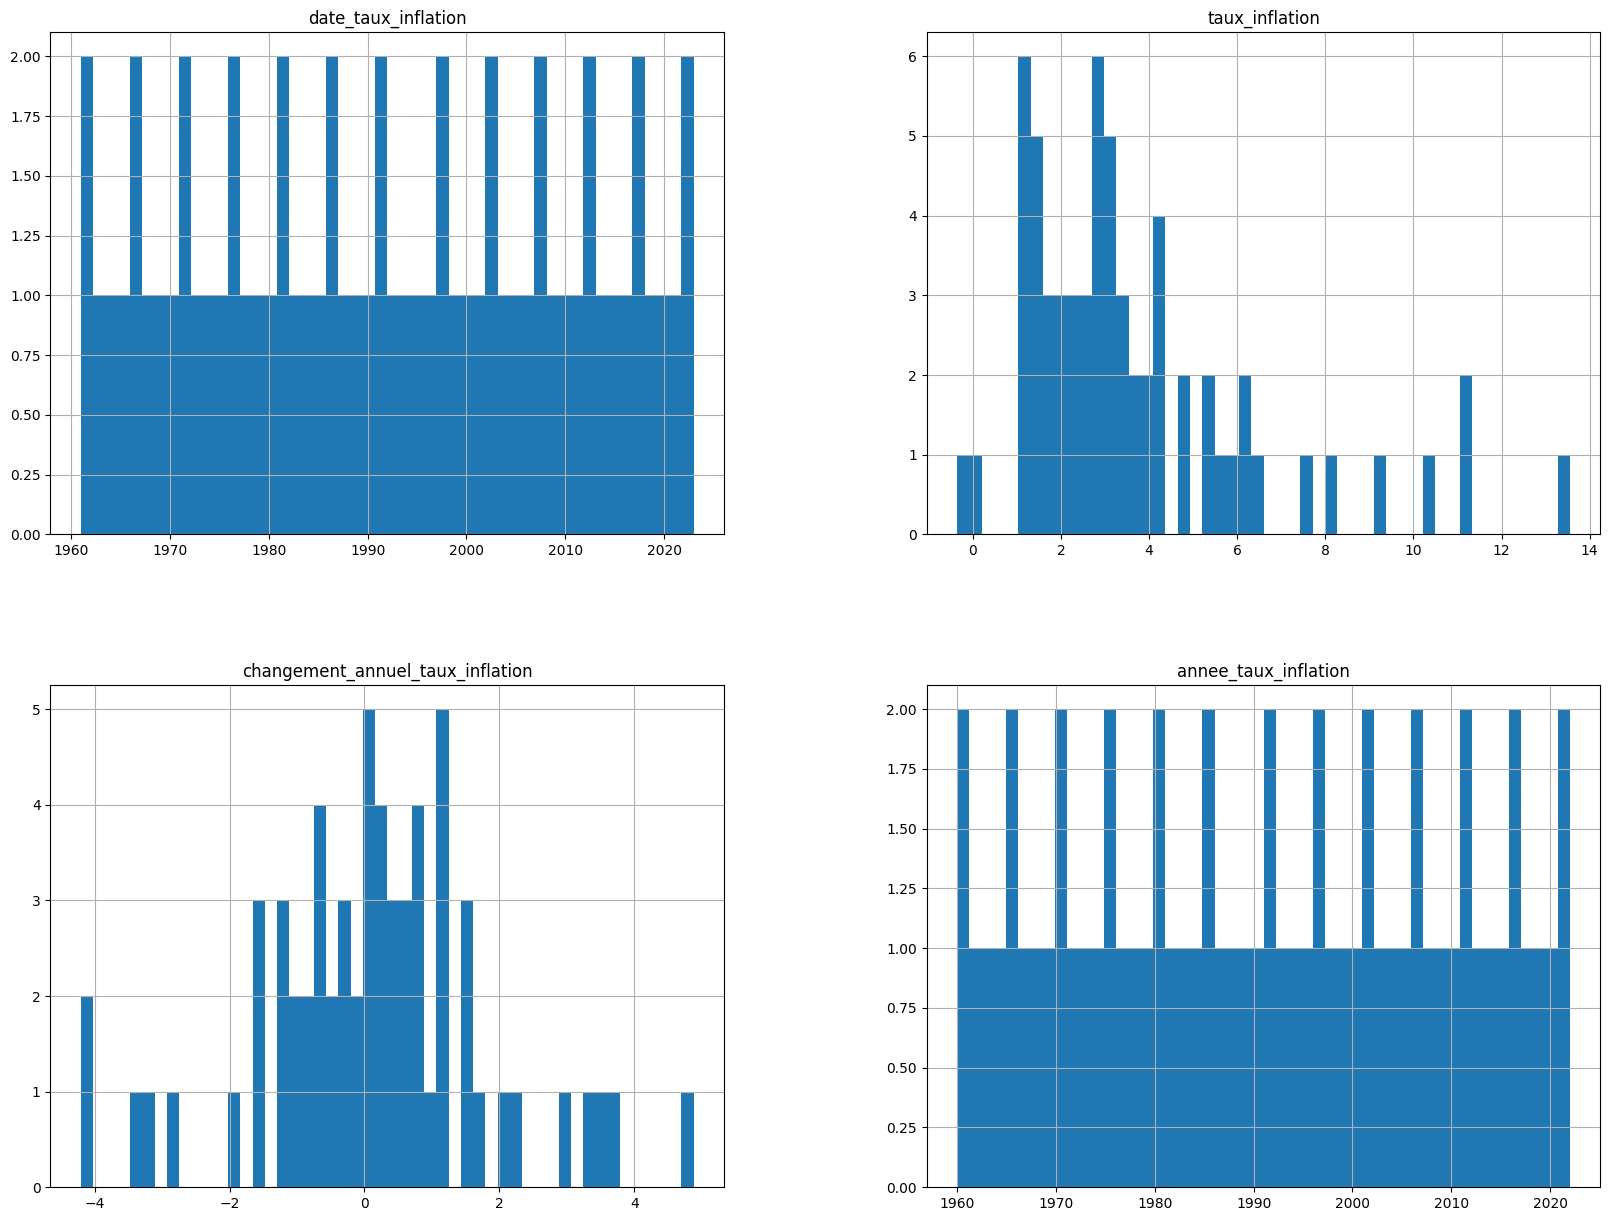

In [ ]:
# Répartition des variables
data_taux_inflation.hist(bins=50, figsize=(20,15))
plt.show()

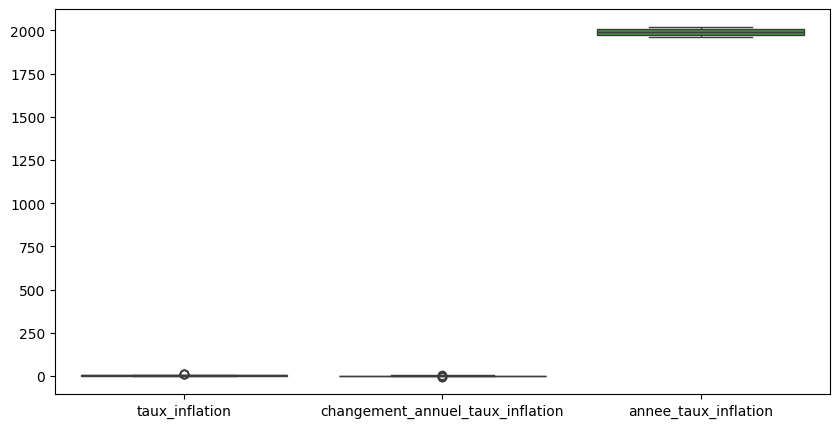

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_taux_inflation, orient="v")  # "orient" spécifie l'orientation des boxplots
plt.show()

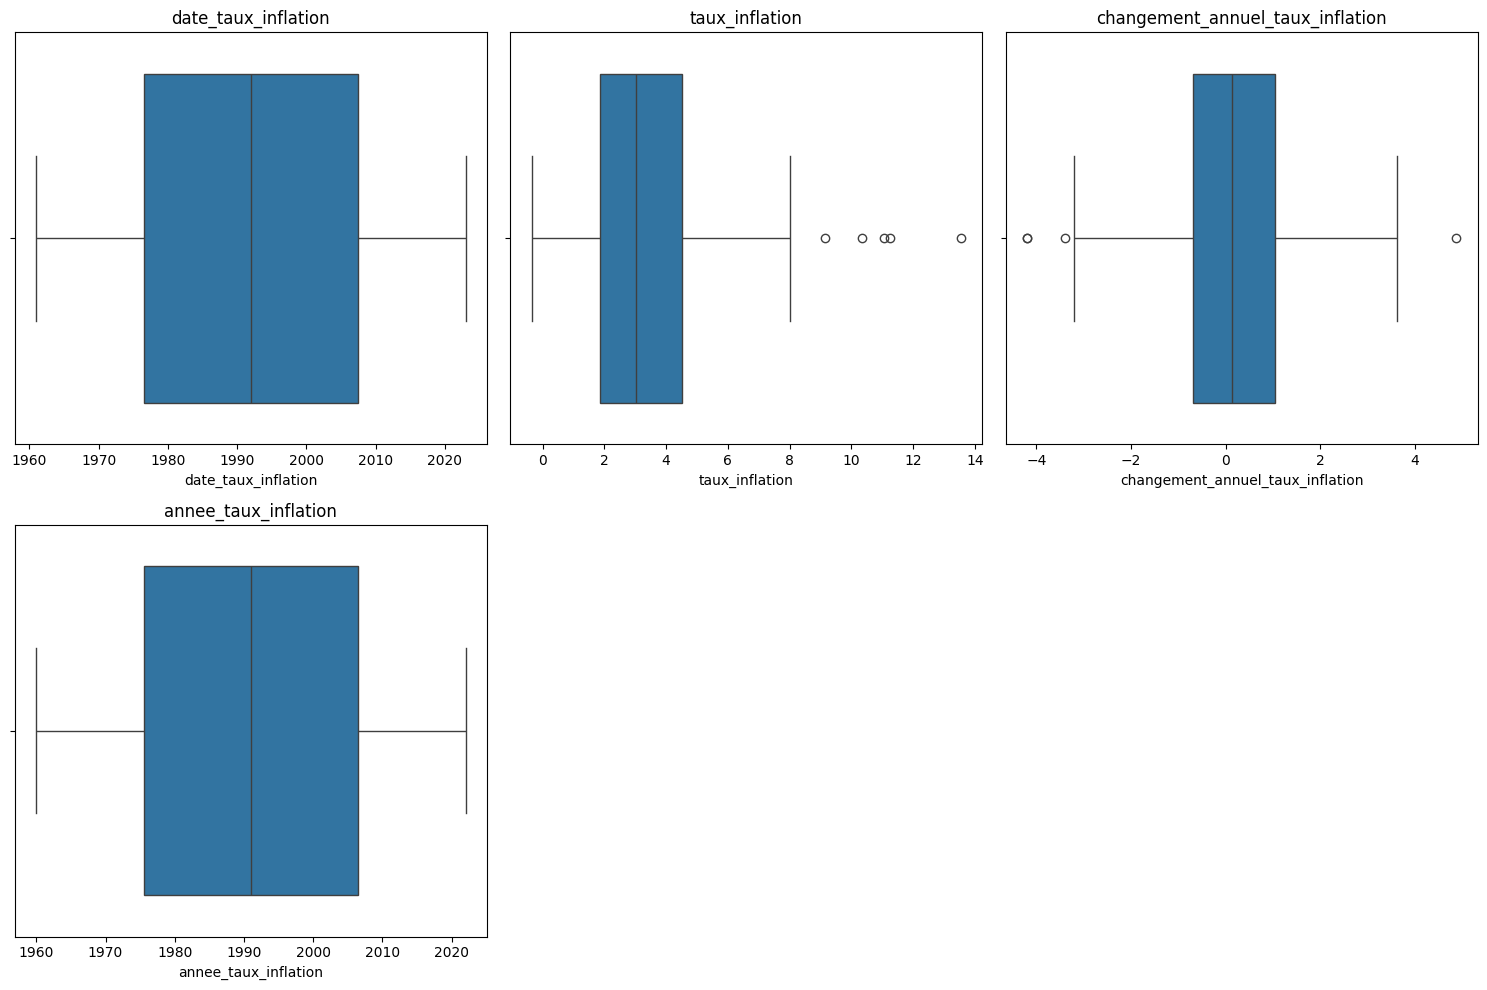

In [ ]:
num_variables = len(data_taux_inflation.columns)
num_cols = 3  # Nombre de colonnes dans la disposition des sous-graphiques
num_rows = (num_variables + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaire
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Création de la figure
axes = axes.flatten()

# Tracer un boxplot pour chaque variable sur un sous-graphique différent
for i, variable in enumerate(data_taux_inflation.columns):
    sns.boxplot(x=data_taux_inflation[variable], ax=axes[i])
    axes[i].set_title(variable)  # Définir le titre de chaque sous-graphique avec le nom de la variable

# Masquer les axes non utilisés
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

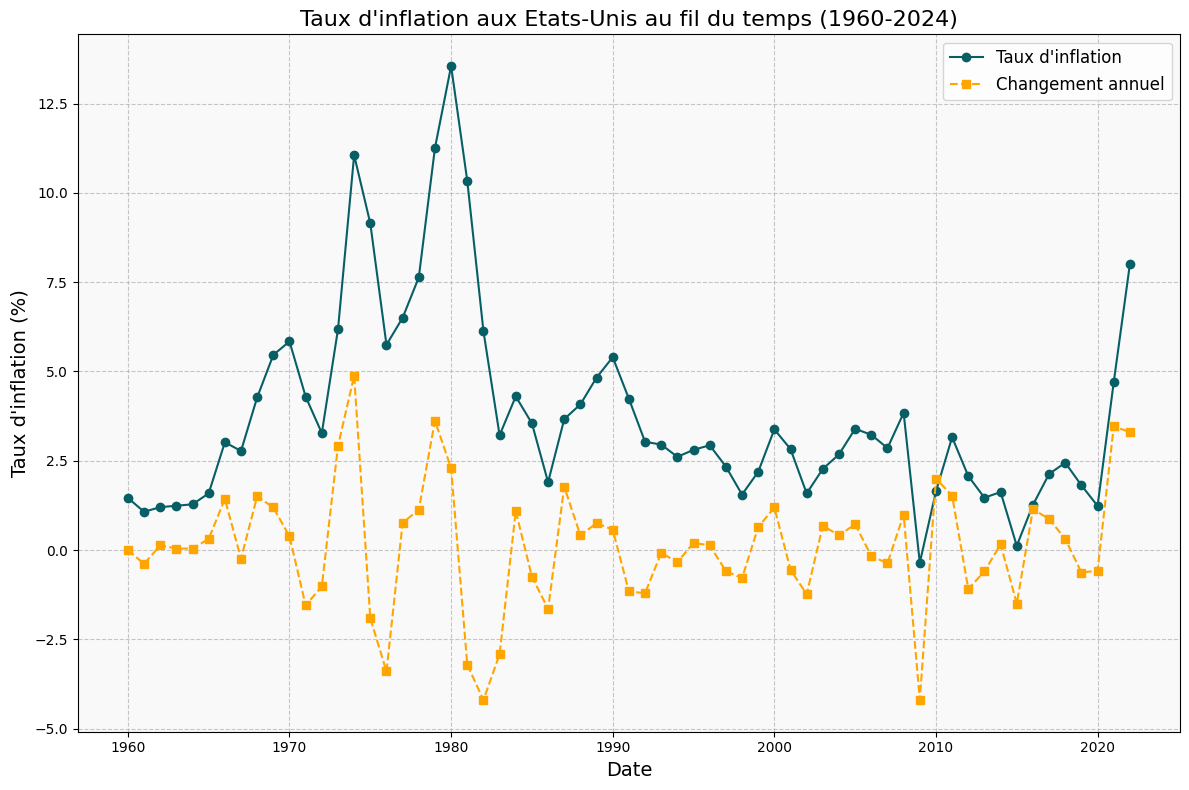

In [ ]:
# Création du graphique
plt.figure(figsize=(12, 8))  # Ajustement de la taille du graphique
plt.plot(data_taux_inflation['annee_taux_inflation'], data_taux_inflation['taux_inflation'], marker='o', linestyle='-',
         color='#075F65', label='Taux d\'inflation')  # Ligne pour le taux d'inflation
plt.plot(data_taux_inflation['annee_taux_inflation'], data_taux_inflation['changement_annuel_taux_inflation'], marker='s', linestyle='--',
         color='orange', label='Changement annuel')  # Ligne pour le changement annuel (utilisant une couleur orange)
plt.xlabel('Date', fontsize=14)  # Ajustement de la taille de la police pour l'axe des x
plt.ylabel('Taux d\'inflation (%)', fontsize=14)  # Ajustement de la taille de la police pour l'axe des y
plt.title('Taux d\'inflation aux Etats-Unis au fil du temps (1960-2024)', fontsize=16)  # Ajustement de la taille de la police pour le titre
plt.legend(fontsize=12)  # Ajustement de la taille de la police pour la légende
plt.grid(True, linestyle='--', alpha=0.7)  # Modification du style de la grille
plt.gca().set_facecolor('#f9f9f9')  # Changement de la couleur de fond du graphique
plt.tight_layout()  # Amélioration de la disposition du graphique
plt.show()

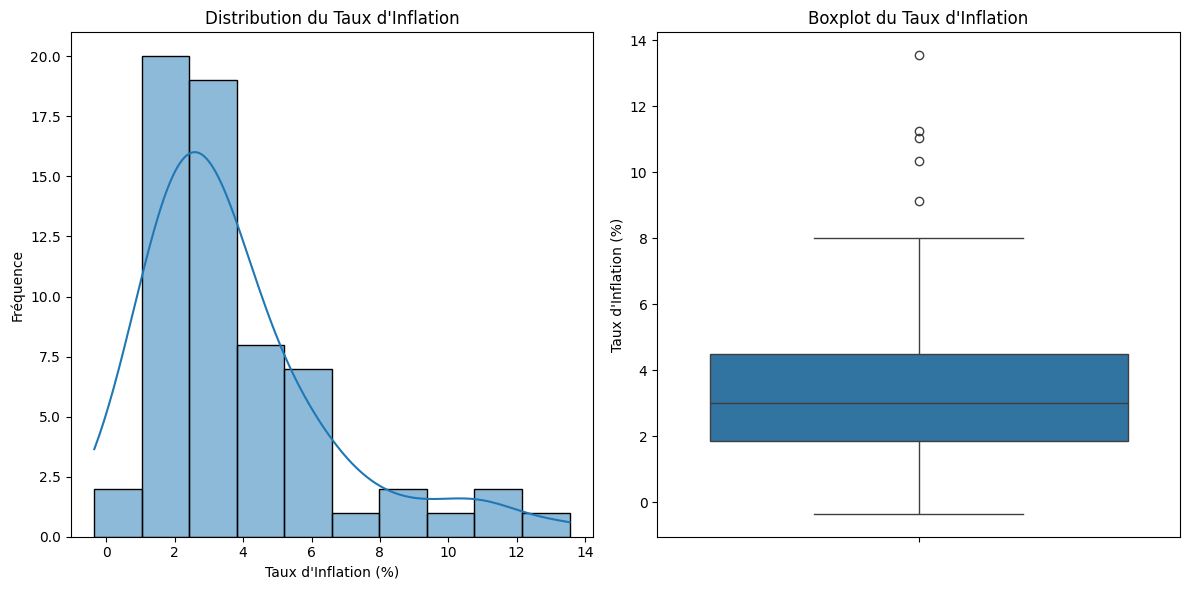

In [ ]:
# Création de sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme
sns.histplot(data_taux_inflation['taux_inflation'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Distribution du Taux d\'Inflation')
axs[0].set_xlabel('Taux d\'Inflation (%)')
axs[0].set_ylabel('Fréquence')

# Boxplot
sns.boxplot(y=data_taux_inflation['taux_inflation'], ax=axs[1])
axs[1].set_title('Boxplot du Taux d\'Inflation')
axs[1].set_ylabel('Taux d\'Inflation (%)')

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

# Affichage
plt.show()

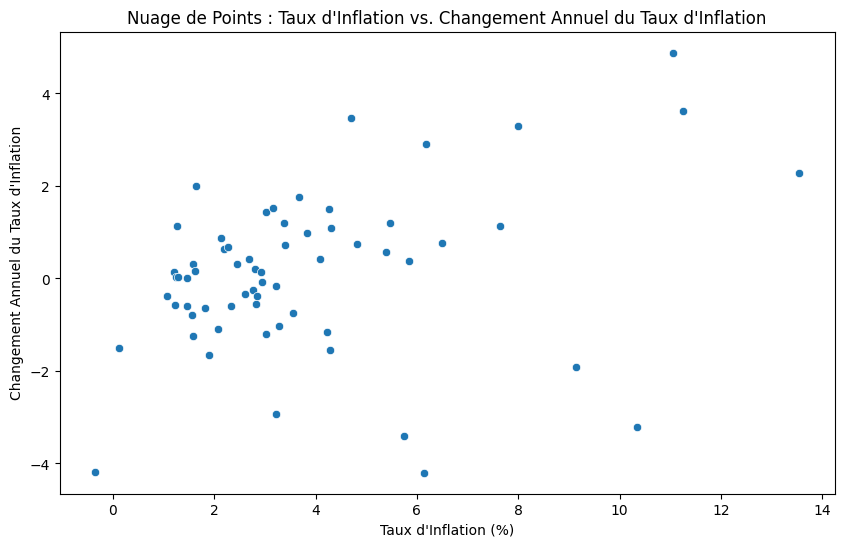

In [ ]:
# Nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='taux_inflation', y='changement_annuel_taux_inflation', data=data_taux_inflation)
plt.title('Nuage de Points : Taux d\'Inflation vs. Changement Annuel du Taux d\'Inflation')
plt.xlabel('Taux d\'Inflation (%)')
plt.ylabel('Changement Annuel du Taux d\'Inflation')
plt.show()

<ipython-input-23-3a50a495e8f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_taux_inflation[['taux_inflation', 'changement_annuel_taux_inflation', 'date_taux_inflation', 'annee_taux_inflation']].corr()


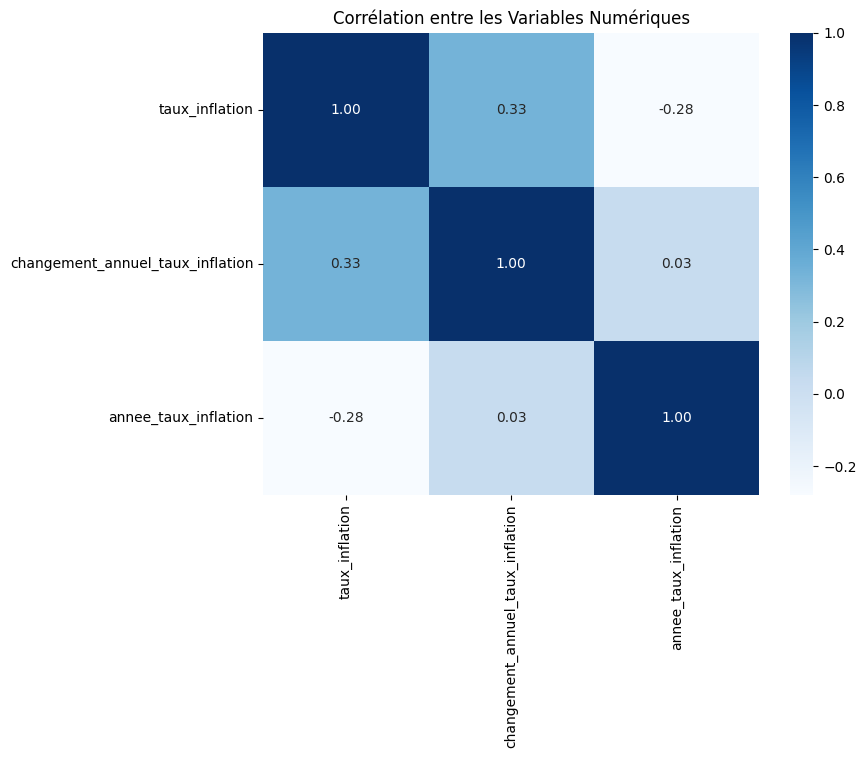

In [ ]:
# Calcul de la corrélation
corr = data_taux_inflation[['taux_inflation', 'changement_annuel_taux_inflation', 'date_taux_inflation', 'annee_taux_inflation']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Corrélation entre les Variables Numériques')
plt.show()

### 2.1.3 - Concatenation des 2 dataframes <a class="anchor"  id="sd_dext1"></a>

In [ ]:
df2 = pd.merge(data_etape1, data_taux_inflation, left_on='anneeVente', right_on='annee_taux_inflation', how='left')
df2.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotaleSousSol,utilites,superficieTerrasseBois,anneeConstruction,anneeRenovation,anneeVente,date_taux_inflation,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,79.525002,AllPub,0.000000,2003,2003,2008,2008-12-31,3.8391,0.99,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,117.243636,AllPub,27.685106,1976,1976,2007,2007-12-31,2.8527,-0.37,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,85.470797,AllPub,0.000000,2001,2002,2008,2008-12-31,3.8391,0.99,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,70.234698,AllPub,0.000000,1915,1970,2006,2006-12-31,3.2259,-0.17,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,106.373981,AllPub,17.837384,2000,2000,2008,2008-12-31,3.8391,0.99,2008


In [ ]:
df2.shape

(2903, 85)

In [ ]:
print(df2.columns)

Index(['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons',
       'typeAlleeAcces', 'nbChambres', 'typeBatiment', 'conditionSousSol',
       'expositionSousSol', 'superficieFinieSousSol1',
       'superficieFinieSousSol2', 'qualiteSurfaceFinieSousSol1',
       'qualiteSurfaceFinieSousSol2', 'nbSallesBainSs', 'nbDemiSallesBainSs',
       'qualiteSousSol', 'superficieSousSolNonAmenagee', 'climatisation',
       'proxRoute1', 'proxRoute2', 'systElectrique', 'superficiePorcheFerme',
       'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1',
       'materiauExterieur2', 'cloture', 'qualiteCheminee', 'nbCheminees',
       'fondation', 'nbSallesBain', 'fonctionnalites', 'superficieGarage',
       'nbPlacesVoiture', 'conditionGarage', 'interieurGarage',
       'qualiteGarage', 'typeGarage', 'anneeConstrGarage',
       'superficieHabitableSaufSs', 'nbDemiSallesBain', 'chauffage',
       'qualiteChauffage', 'styleBatiment', 'id', 'nbCuisines',
       'qualiteCuisine

In [ ]:
# Vérifier la coherence en affichant les premières lignes des colonnes anneeConstruction et anneeVente et les nouvelles colonnes
df2[['anneeConstruction', 'anneeVente', 'annee_taux_inflation','taux_inflation',
     'changement_annuel_taux_inflation', 'date_taux_inflation']].head(100)

,anneeConstruction,anneeVente,annee_taux_inflation,taux_inflation,changement_annuel_taux_inflation,date_taux_inflation
0,2003,2008,2008,3.8391,0.99,2008-12-31
1,1976,2007,2007,2.8527,-0.37,2007-12-31
2,2001,2008,2008,3.8391,0.99,2008-12-31
3,1915,2006,2006,3.2259,-0.17,2006-12-31
4,2000,2008,2008,3.8391,0.99,2008-12-31
...,...,...,...,...,...,...
95,1993,2009,2009,-0.3555,-4.19,2009-12-31
96,1999,2006,2006,3.2259,-0.17,2006-12-31
97,1965,2007,2007,2.8527,-0.37,2007-12-31
98,1920,2010,2010,1.6400,2.00,2010-12-31


In [ ]:
# Exportation de la base de données obtenue après suppréssion de valeurs manquantes et aberrantes
df2.to_csv('data_etape_0201.csv', index = False)

## 2.2 - Données Externes 2 : Taux de criminalité aux Etats-Unis de 2000 à 2017<a class="anchor"  id="ttaux_criminalité"></a>
-----------------

In [ ]:
df3 = pd.read_csv('data_etape_0201.csv')
df3.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotaleSousSol,utilites,superficieTerrasseBois,anneeConstruction,anneeRenovation,anneeVente,date_taux_inflation,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,79.525002,AllPub,0.000000,2003,2003,2008,2008-12-31,3.8391,0.99,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,117.243636,AllPub,27.685106,1976,1976,2007,2007-12-31,2.8527,-0.37,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,85.470797,AllPub,0.000000,2001,2002,2008,2008-12-31,3.8391,0.99,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,70.234698,AllPub,0.000000,1915,1970,2006,2006-12-31,3.2259,-0.17,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,106.373981,AllPub,17.837384,2000,2000,2008,2008-12-31,3.8391,0.99,2008


In [ ]:
df3.shape

(2903, 85)

In [ ]:
data_criminality_rate = pd.read_csv('tauxCriminalite_2000_2017.csv', sep = ',')
data_criminality_rate.head()

,date,Ames,IA,US
0,2000-12-31,NaN,266.4093,506.5299
1,2001-12-31,NaN,268.2499,504.5185
2,2002-12-31,NaN,285.7104,494.3771
3,2003-12-31,546.6301,277.8745,475.8351
4,2004-12-31,241.2478,287.8184,463.1556


In [ ]:
data_criminality_rate.shape

(18, 4)

In [ ]:
# Renommage de colonnes de la base
correspondance_noms = {
    'date': 'date_taux_criminalite',
    ' Ames':'ames_taux_criminalite',
    ' IA':'iowa_taux_criminalite',
    ' US':'etatsunis_taux_criminalite'
}

data_taux_criminalite = data_criminality_rate.copy().rename(columns = correspondance_noms)
data_taux_criminalite.head()

,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite
0,2000-12-31,NaN,266.4093,506.5299
1,2001-12-31,NaN,268.2499,504.5185
2,2002-12-31,NaN,285.7104,494.3771
3,2003-12-31,546.6301,277.8745,475.8351
4,2004-12-31,241.2478,287.8184,463.1556


In [ ]:
data_taux_criminalite.dtypes

date_taux_criminalite          object
ames_taux_criminalite         float64
iowa_taux_criminalite         float64
etatsunis_taux_criminalite    float64
dtype: object

In [ ]:
# Transformation du type de la variable date, de 'objet' en 'datetime64'
data_taux_criminalite['date_taux_criminalite'] = pd.to_datetime(data_taux_criminalite['date_taux_criminalite'])

In [ ]:
data_taux_criminalite.dtypes

date_taux_criminalite         datetime64[ns]
ames_taux_criminalite                float64
iowa_taux_criminalite                float64
etatsunis_taux_criminalite           float64
dtype: object

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Interprétation </strong>

Nous disposons d'une base contenant 18 enregistrements du taux de criminalité aux Etats-Unis, de 1960 à 2024. Comme toutes les dates sont enregistrées au 31 décembre de chaque année, nous allons nous intéresser uniquement à l'année. Pour ce faire, nous allons créer une nouvelle colonne appelée `annee_taux_criminalite` dans laquelle nous allons extraire l'année à partir de la colonne `date_taux_criminalite`.
</div>

In [ ]:
# Comme toutes les dates sont enregistrées au31/12 de chaque année, nous allons nous interesser selement à l'année
# Ajouter une colonne 'year' avec l'année extraite de la colonne 'date'
data_taux_criminalite['annee_taux_criminalite'] = pd.to_datetime(data_taux_criminalite['date_taux_criminalite']).dt.year

# Afficher les premières lignes de la DataFrame pour vérification
print(data_taux_criminalite.head())

  date_taux_criminalite  ames_taux_criminalite  iowa_taux_criminalite  \
0            2000-12-31                    NaN               266.4093   
1            2001-12-31                    NaN               268.2499   
2            2002-12-31                    NaN               285.7104   
3            2003-12-31               546.6301               277.8745   
4            2004-12-31               241.2478               287.8184   

   etatsunis_taux_criminalite  annee_taux_criminalite  
0                    506.5299                    2000  
1                    504.5185                    2001  
2                    494.3771                    2002  
3                    475.8351                    2003  
4                    463.1556                    2004  


### 2.2.1 - Traitement des valeurs manquantes <a class="anchor"  id="valeur_manquante2"></a>

In [ ]:
#Le nombre de données manquantes
VM = data_taux_criminalite.isnull().sum()
VM2=VM[VM > 0]
VM2

ames_taux_criminalite    3
dtype: int64

In [ ]:
# Pourcentage de données manquantes par variables

nombre_total_observations = len(data_taux_criminalite.index)

# Calcul de la proportion de données manquantes
prop_don_manquantes = (VM2 / nombre_total_observations) * 100

prop_don_manquantes

ames_taux_criminalite    16.666667
dtype: float64

In [ ]:
# Remplacement des données manquantes par le mode
data_taux_criminalite['ames_taux_criminalite'].fillna(data_taux_criminalite['ames_taux_criminalite'].mode()[0], inplace=True)

In [ ]:
#Le nombre de données manquantes
VM = data_taux_criminalite.isnull().sum()
VM2=VM[VM > 0]
VM2

Series([], dtype: int64)

### 2.2.2 - Statistiques descriptives <a class="anchor"  id="stat_desc2"></a>

In [ ]:
data_taux_criminalite.head(20)

,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite
0,2000-12-31,119.9731,266.4093,506.5299,2000
1,2001-12-31,119.9731,268.2499,504.5185,2001
2,2002-12-31,119.9731,285.7104,494.3771,2002
3,2003-12-31,546.6301,277.8745,475.8351,2003
4,2004-12-31,241.2478,287.8184,463.1556,2004
5,2005-12-31,186.5636,293.2703,469.0428,2005
6,2006-12-31,279.7815,285.7397,479.3354,2006
7,2007-12-31,387.4317,300.1962,471.7739,2007
8,2008-12-31,313.1278,288.1213,458.6142,2008
9,2009-12-31,309.5867,282.0946,431.8787,2009


In [ ]:
data_taux_criminalite.describe()

,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite
count,18.000000,18.000000,18.000000,18.000000
mean,229.079872,279.401178,435.065667,2008.500000
std,116.804888,11.619305,50.259196,5.338539
min,119.973100,257.269900,361.553900,2000.000000
25%,134.651000,269.615450,389.530275,2004.250000
50%,185.186750,279.984550,445.246450,2008.500000
75%,304.678800,287.739150,474.819800,2012.750000
max,546.630100,300.196200,506.529900,2017.000000


In [ ]:
data_taux_criminalite.dtypes

date_taux_criminalite         datetime64[ns]
ames_taux_criminalite                float64
iowa_taux_criminalite                float64
etatsunis_taux_criminalite           float64
annee_taux_criminalite                 int64
dtype: object

In [ ]:
# Convertir l'année en entier
data_taux_criminalite['annee_taux_criminalite'] = data_taux_criminalite['annee_taux_criminalite'].astype(int)

In [ ]:
data_taux_criminalite.dtypes

date_taux_criminalite         datetime64[ns]
ames_taux_criminalite                float64
iowa_taux_criminalite                float64
etatsunis_taux_criminalite           float64
annee_taux_criminalite                 int64
dtype: object

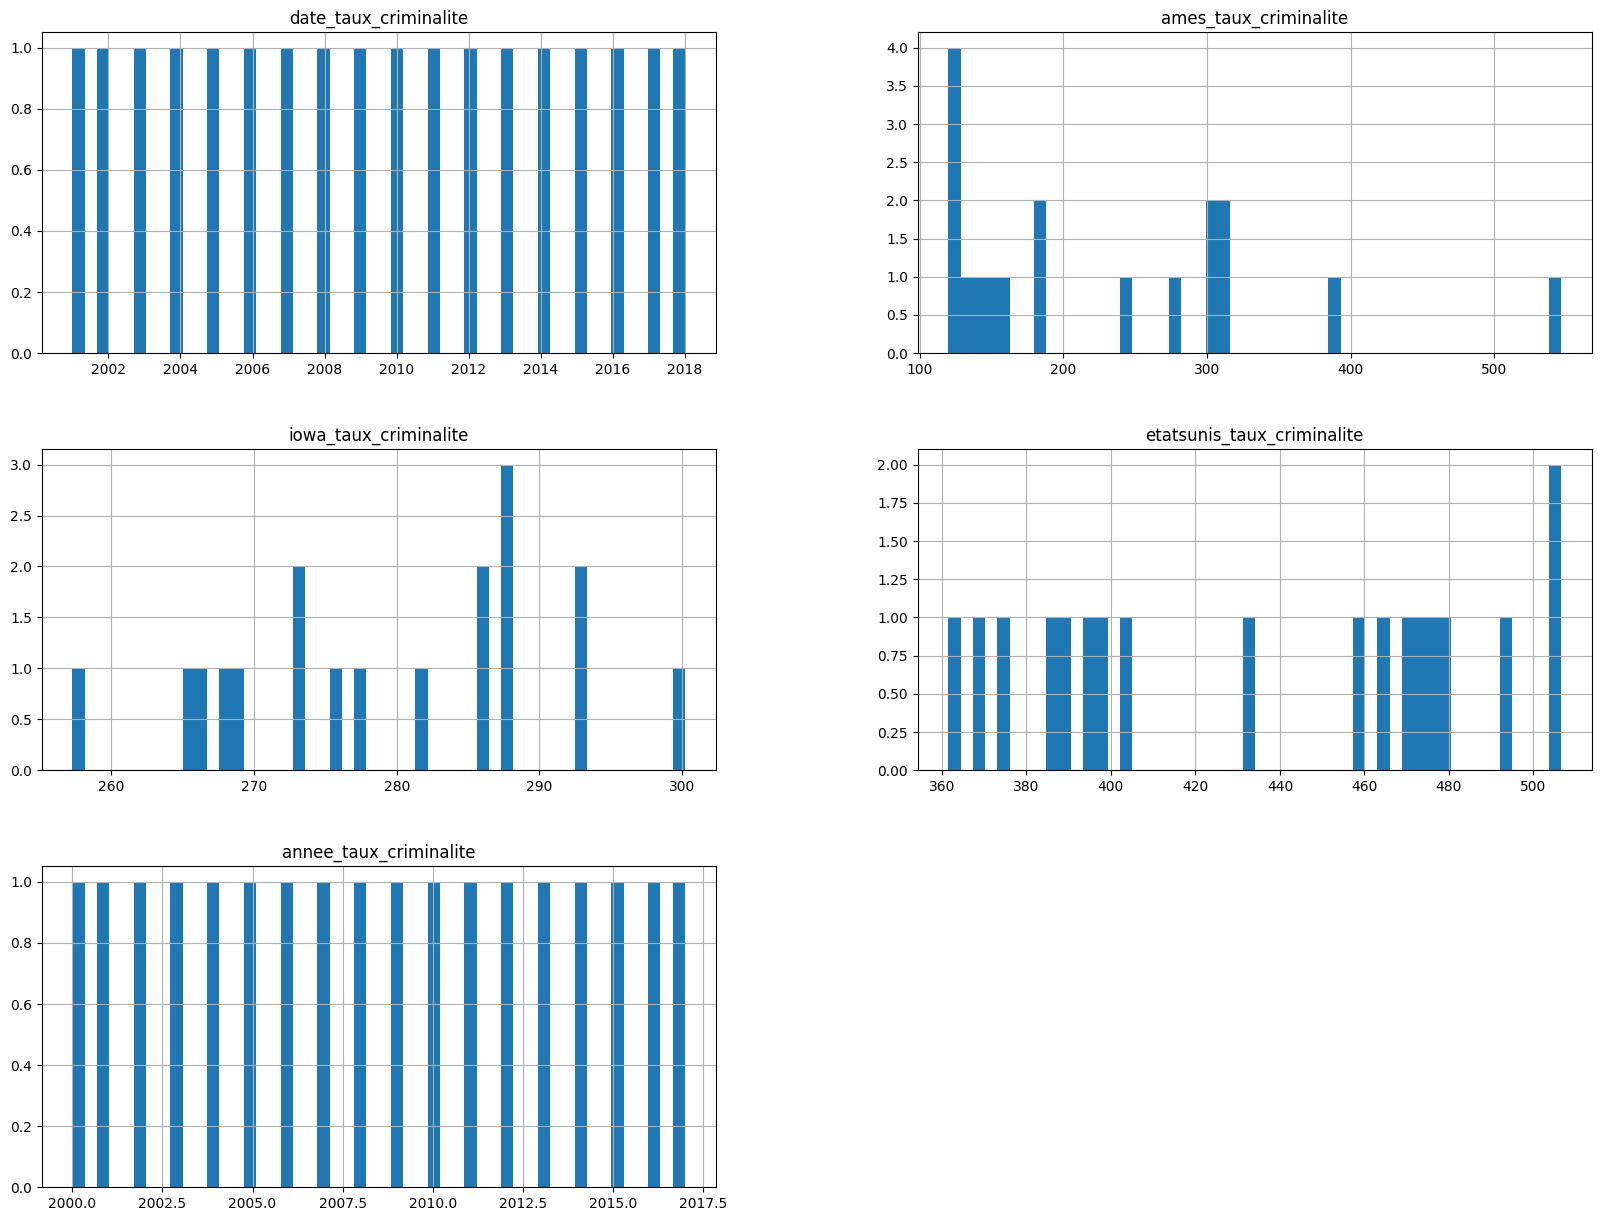

In [ ]:
# Répartition des variables
data_taux_criminalite.hist(bins=50, figsize=(20,15))
plt.show()

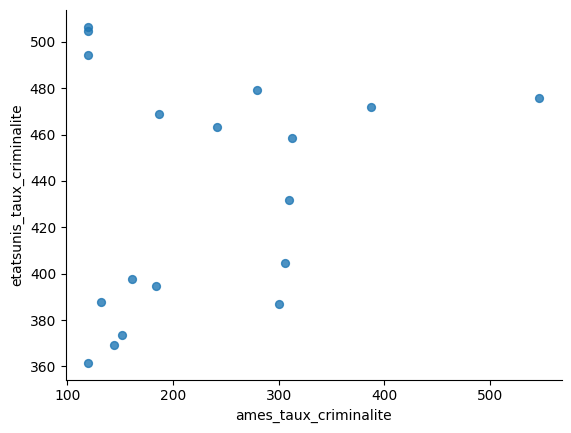

In [ ]:
# ames_taux_criminalite vs etatsunis_taux_criminalite

from matplotlib import pyplot as plt
data_taux_criminalite.plot(kind='scatter', x='ames_taux_criminalite', y='etatsunis_taux_criminalite', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

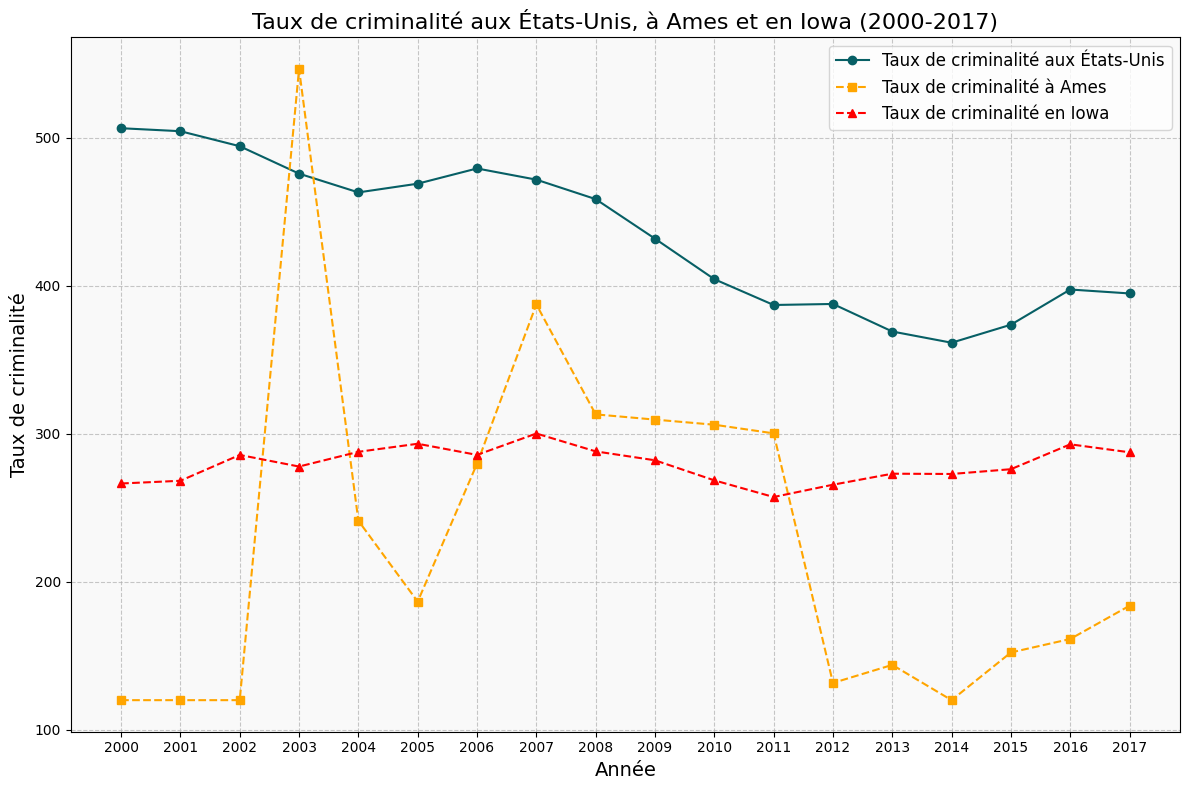

In [ ]:
# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(data_taux_criminalite['annee_taux_criminalite'], data_taux_criminalite['etatsunis_taux_criminalite'], marker='o', linestyle='-',
         color='#075F65', label='Taux de criminalité aux États-Unis')
plt.plot(data_taux_criminalite['annee_taux_criminalite'], data_taux_criminalite['ames_taux_criminalite'], marker='s', linestyle='--',
         color='orange', label='Taux de criminalité à Ames')
plt.plot(data_taux_criminalite['annee_taux_criminalite'], data_taux_criminalite['iowa_taux_criminalite'], marker='^', linestyle='--',
         color='red', label='Taux de criminalité en Iowa')

plt.xlabel('Année', fontsize=14)
plt.ylabel('Taux de criminalité', fontsize=14)
plt.title('Taux de criminalité aux États-Unis, à Ames et en Iowa (2000-2017)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

# Spécifier explicitement les valeurs de l'axe des x
plt.xticks(data_taux_criminalite['annee_taux_criminalite'])

plt.tight_layout()
plt.show()

<ipython-input-50-8077783cb9b2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data_taux_criminalite.groupby('annee_taux_criminalite').mean()


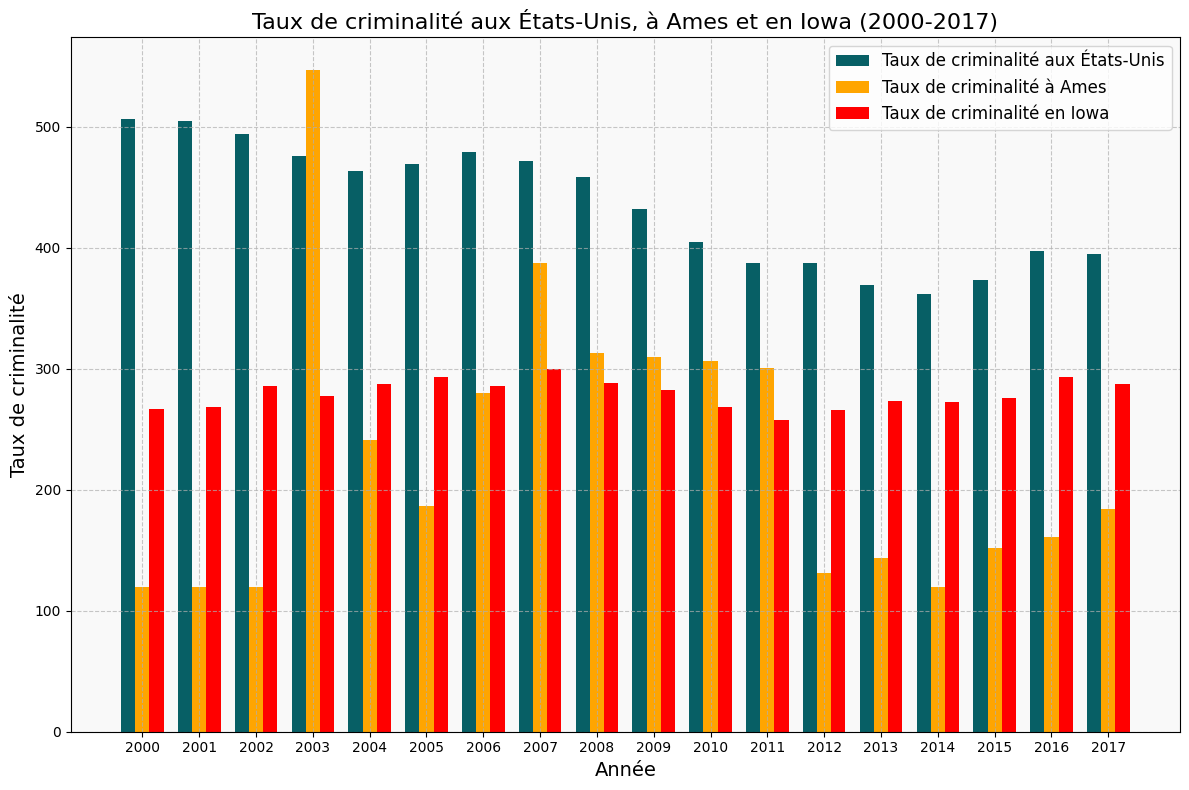

In [ ]:
# Regroupement des données par année
data_grouped = data_taux_criminalite.groupby('annee_taux_criminalite').mean()

# Création du graphique
plt.figure(figsize=(12, 8))  # Ajustement de la taille du graphique
bar_width = 0.25  # Largeur des barres
plt.bar(data_grouped.index - bar_width, data_grouped['etatsunis_taux_criminalite'], width=bar_width, color='#075F65', label='Taux de criminalité aux États-Unis')  # Barres pour le taux de criminalité aux États-Unis
plt.bar(data_grouped.index, data_grouped['ames_taux_criminalite'], width=bar_width, color='orange', label='Taux de criminalité à Ames')  # Barres pour le taux de criminalité à Ames
plt.bar(data_grouped.index + bar_width, data_grouped['iowa_taux_criminalite'], width=bar_width, color='red', label='Taux de criminalité en Iowa')  # Barres pour le taux de criminalité en Iowa
plt.xlabel('Année', fontsize=14)  # Ajustement de la taille de la police pour l'axe des x
plt.ylabel('Taux de criminalité', fontsize=14)  # Ajustement de la taille de la police pour l'axe des y
plt.title('Taux de criminalité aux États-Unis, à Ames et en Iowa (2000-2017)', fontsize=16)  # Ajustement de la taille de la police pour le titre
plt.legend(fontsize=12)  # Ajustement de la taille de la police pour la légende
plt.grid(True, linestyle='--', alpha=0.7)  # Modification du style de la grille
plt.gca().set_facecolor('#f9f9f9')  # Changement de la couleur de fond du graphique

# Ajuster les valeurs de l'axe des x
plt.xticks(data_grouped.index)

plt.tight_layout()  # Amélioration de la disposition du graphique
plt.show()

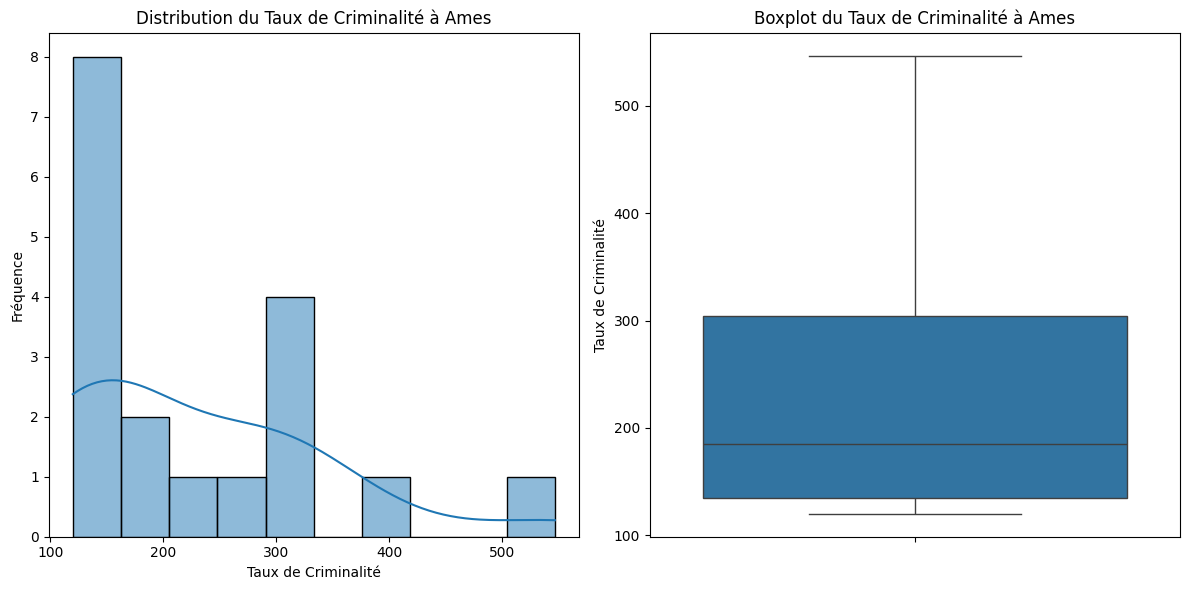

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme
sns.histplot(data_taux_criminalite['ames_taux_criminalite'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Distribution du Taux de Criminalité à Ames')
axs[0].set_xlabel('Taux de Criminalité')
axs[0].set_ylabel('Fréquence')

# Boxplot
sns.boxplot(y=data_taux_criminalite['ames_taux_criminalite'], ax=axs[1])
axs[1].set_title('Boxplot du Taux de Criminalité à Ames')
axs[1].set_ylabel('Taux de Criminalité')

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

# Affichage
plt.show()

<ipython-input-52-2d34404e5987>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'annee_taux_criminalite']].corr()


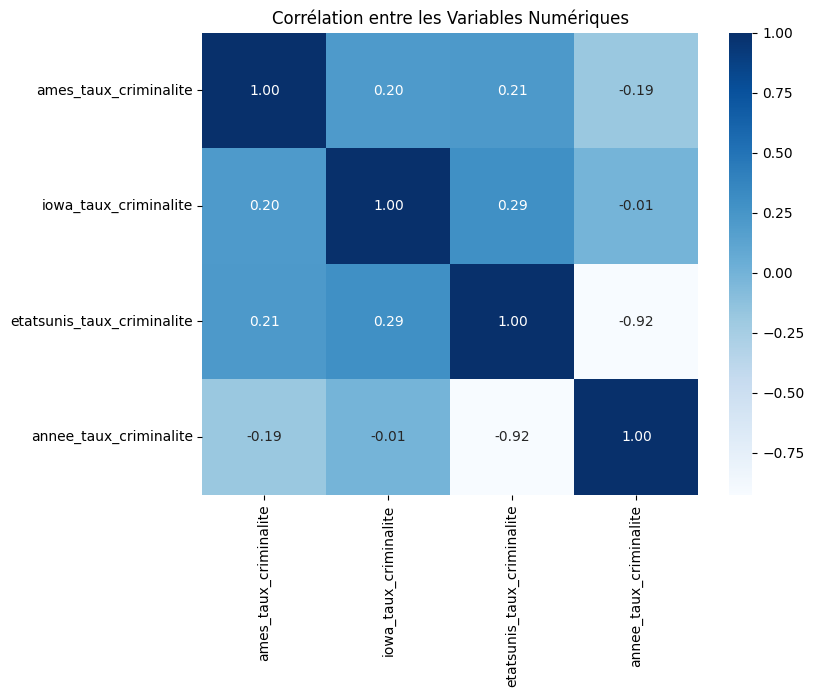

In [ ]:
# Calcul de la corrélation
corr = data_taux_criminalite[['date_taux_criminalite',
                            'ames_taux_criminalite',
                            'iowa_taux_criminalite',
                            'etatsunis_taux_criminalite',
                            'annee_taux_criminalite']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Corrélation entre les Variables Numériques')
plt.show()

### 2.2.3 - Concatenation des 2 dataframes <a class="anchor"  id="sd_dext2"></a>

In [ ]:
df4 = pd.merge(df3, data_taux_criminalite, left_on='anneeVente', right_on='annee_taux_criminalite', how='left')
df4.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,anneeVente,date_taux_inflation,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2007,2007-12-31,2.8527,-0.37,2007,2007-12-31,387.4317,300.1962,471.7739,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,2006,2006-12-31,3.2259,-0.17,2006,2006-12-31,279.7815,285.7397,479.3354,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008


In [ ]:
df4.shape

(2903, 90)

In [ ]:
print(df4.columns)

Index(['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons',
       'typeAlleeAcces', 'nbChambres', 'typeBatiment', 'conditionSousSol',
       'expositionSousSol', 'superficieFinieSousSol1',
       'superficieFinieSousSol2', 'qualiteSurfaceFinieSousSol1',
       'qualiteSurfaceFinieSousSol2', 'nbSallesBainSs', 'nbDemiSallesBainSs',
       'qualiteSousSol', 'superficieSousSolNonAmenagee', 'climatisation',
       'proxRoute1', 'proxRoute2', 'systElectrique', 'superficiePorcheFerme',
       'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1',
       'materiauExterieur2', 'cloture', 'qualiteCheminee', 'nbCheminees',
       'fondation', 'nbSallesBain', 'fonctionnalites', 'superficieGarage',
       'nbPlacesVoiture', 'conditionGarage', 'interieurGarage',
       'qualiteGarage', 'typeGarage', 'anneeConstrGarage',
       'superficieHabitableSaufSs', 'nbDemiSallesBain', 'chauffage',
       'qualiteChauffage', 'styleBatiment', 'id', 'nbCuisines',
       'qualiteCuisine

In [ ]:
# Vérifier la coherence en affichant les premières lignes des colonnes anneeConstruction et anneeVente et les nouvelles colonnes
df4[['anneeConstruction', 'anneeVente', 'annee_taux_criminalite', 'date_taux_criminalite', 'ames_taux_criminalite',
'iowa_taux_criminalite','etatsunis_taux_criminalite']].head(100)

,anneeConstruction,anneeVente,annee_taux_criminalite,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite
0,2003,2008,2008,2008-12-31,313.1278,288.1213,458.6142
1,1976,2007,2007,2007-12-31,387.4317,300.1962,471.7739
2,2001,2008,2008,2008-12-31,313.1278,288.1213,458.6142
3,1915,2006,2006,2006-12-31,279.7815,285.7397,479.3354
4,2000,2008,2008,2008-12-31,313.1278,288.1213,458.6142
...,...,...,...,...,...,...,...
95,1993,2009,2009,2009-12-31,309.5867,282.0946,431.8787
96,1999,2006,2006,2006-12-31,279.7815,285.7397,479.3354
97,1965,2007,2007,2007-12-31,387.4317,300.1962,471.7739
98,1920,2010,2010,2010-12-31,306.1383,268.5396,404.5023


In [ ]:
# Exportation de la base de données obtenue après suppréssion de valeurs manquantes et aberrantes
df4.to_csv('data_etape_0202.csv', index = False)

## 2.3 - Données Externes 3 : Indice des prix des logements aux Etats-Unis de 2000 à 2017<a class="anchor"  id="indice_prix"></a>
-----------------

In [ ]:
df5 = pd.read_csv('data_etape_0202.csv')
df5.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,anneeVente,date_taux_inflation,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2007,2007-12-31,2.8527,-0.37,2007,2007-12-31,387.4317,300.1962,471.7739,2007
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,2006,2006-12-31,3.2259,-0.17,2006,2006-12-31,279.7815,285.7397,479.3354,2006
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,2008,2008-12-31,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008


In [ ]:
df5.shape

(2903, 90)

In [ ]:
data_HPI_Ames = pd.read_csv('HousePriceIndexAmes_1988_2023.csv')
data_HPI_Ames.head(10)

,DATE,ATNHPIUS11180Q
0,1986-10-01,67.65
1,1987-01-01,67.98
2,1987-04-01,70.50
3,1987-07-01,68.95
4,1987-10-01,69.43
5,1988-01-01,68.23
6,1988-04-01,72.22
7,1988-07-01,71.32
8,1988-10-01,71.70
9,1989-01-01,73.57


In [ ]:
data_HPI_Ames.shape

(148, 2)

In [ ]:
# Renommage de colonnes de la base
correspondance_noms = {
    'DATE': 'date_indice_prix_logements',
    'ATNHPIUS11180Q':'indice_prix_logements'
}

data_indice_prix_logements = data_HPI_Ames.copy().rename(columns = correspondance_noms)
data_indice_prix_logements.head()

,date_indice_prix_logements,indice_prix_logements
0,1986-10-01,67.65
1,1987-01-01,67.98
2,1987-04-01,70.50
3,1987-07-01,68.95
4,1987-10-01,69.43


In [ ]:
data_indice_prix_logements.dtypes

date_indice_prix_logements     object
indice_prix_logements         float64
dtype: object

In [ ]:
# Transformation du type de la variable date, de 'objet' en 'datetime64'
data_indice_prix_logements['date_indice_prix_logements'] = pd.to_datetime(data_indice_prix_logements['date_indice_prix_logements'])

In [ ]:
data_indice_prix_logements.dtypes

date_indice_prix_logements    datetime64[ns]
indice_prix_logements                float64
dtype: object

<div class="alert alert-block alert-primary"; style="background-color: #bededf; padding: 10px;">
⚙️ <strong> Interprétation </strong>

Nous disposons d'une base contenant 142 enregistrements du taux de criminalité aux Etats-Unis, de 1960 à 2024. Comme nous avons plusieurs valeurs de l'Indice pour chaque année, nous allons calculer la moyenne de ces valeurs, pour obtenir l'Indice annuel.
    
</div>

In [ ]:
# Comme toutes les dates sont enregistrées au31/12 de chaque année, nous allons nous interesser selement à l'année
# Ajouter une colonne 'year' avec l'année extraite de la colonne 'date'
data_indice_prix_logements['annee_indice_prix_logements'] = pd.to_datetime(data_indice_prix_logements['date_indice_prix_logements']).dt.year

# Afficher les premières lignes de la DataFrame pour vérification
print(data_indice_prix_logements.head())

  date_indice_prix_logements  indice_prix_logements  \
0                 1986-10-01                  67.65   
1                 1987-01-01                  67.98   
2                 1987-04-01                  70.50   
3                 1987-07-01                  68.95   
4                 1987-10-01                  69.43   

   annee_indice_prix_logements  
0                         1986  
1                         1987  
2                         1987  
3                         1987  
4                         1987  


### 2.3.1 - Traitement des valeurs manquantes <a class="anchor"  id="valeur_manquante3"></a>

In [ ]:
#Le nombre de données manquantes
VM = data_indice_prix_logements.isnull().sum()
VM2=VM[VM > 0]
VM2

Series([], dtype: int64)

### 2.3.2 - Statistiques descriptives <a class="anchor"  id="stat_desc3"></a>

In [ ]:
data_indice_prix_logements.head(20)

,date_indice_prix_logements,indice_prix_logements,annee_indice_prix_logements
0,1986-10-01,67.65,1986
1,1987-01-01,67.98,1987
2,1987-04-01,70.50,1987
3,1987-07-01,68.95,1987
4,1987-10-01,69.43,1987
5,1988-01-01,68.23,1988
6,1988-04-01,72.22,1988
7,1988-07-01,71.32,1988
8,1988-10-01,71.70,1988
9,1989-01-01,73.57,1989


In [ ]:
data_indice_prix_logements.describe()

,indice_prix_logements,annee_indice_prix_logements
count,148.000000,148.00000
mean,149.936824,2004.75000
std,53.020256,10.72214
min,67.650000,1986.00000
25%,106.040000,1995.75000
50%,157.765000,2005.00000
75%,176.870000,2014.00000
max,295.870000,2023.00000


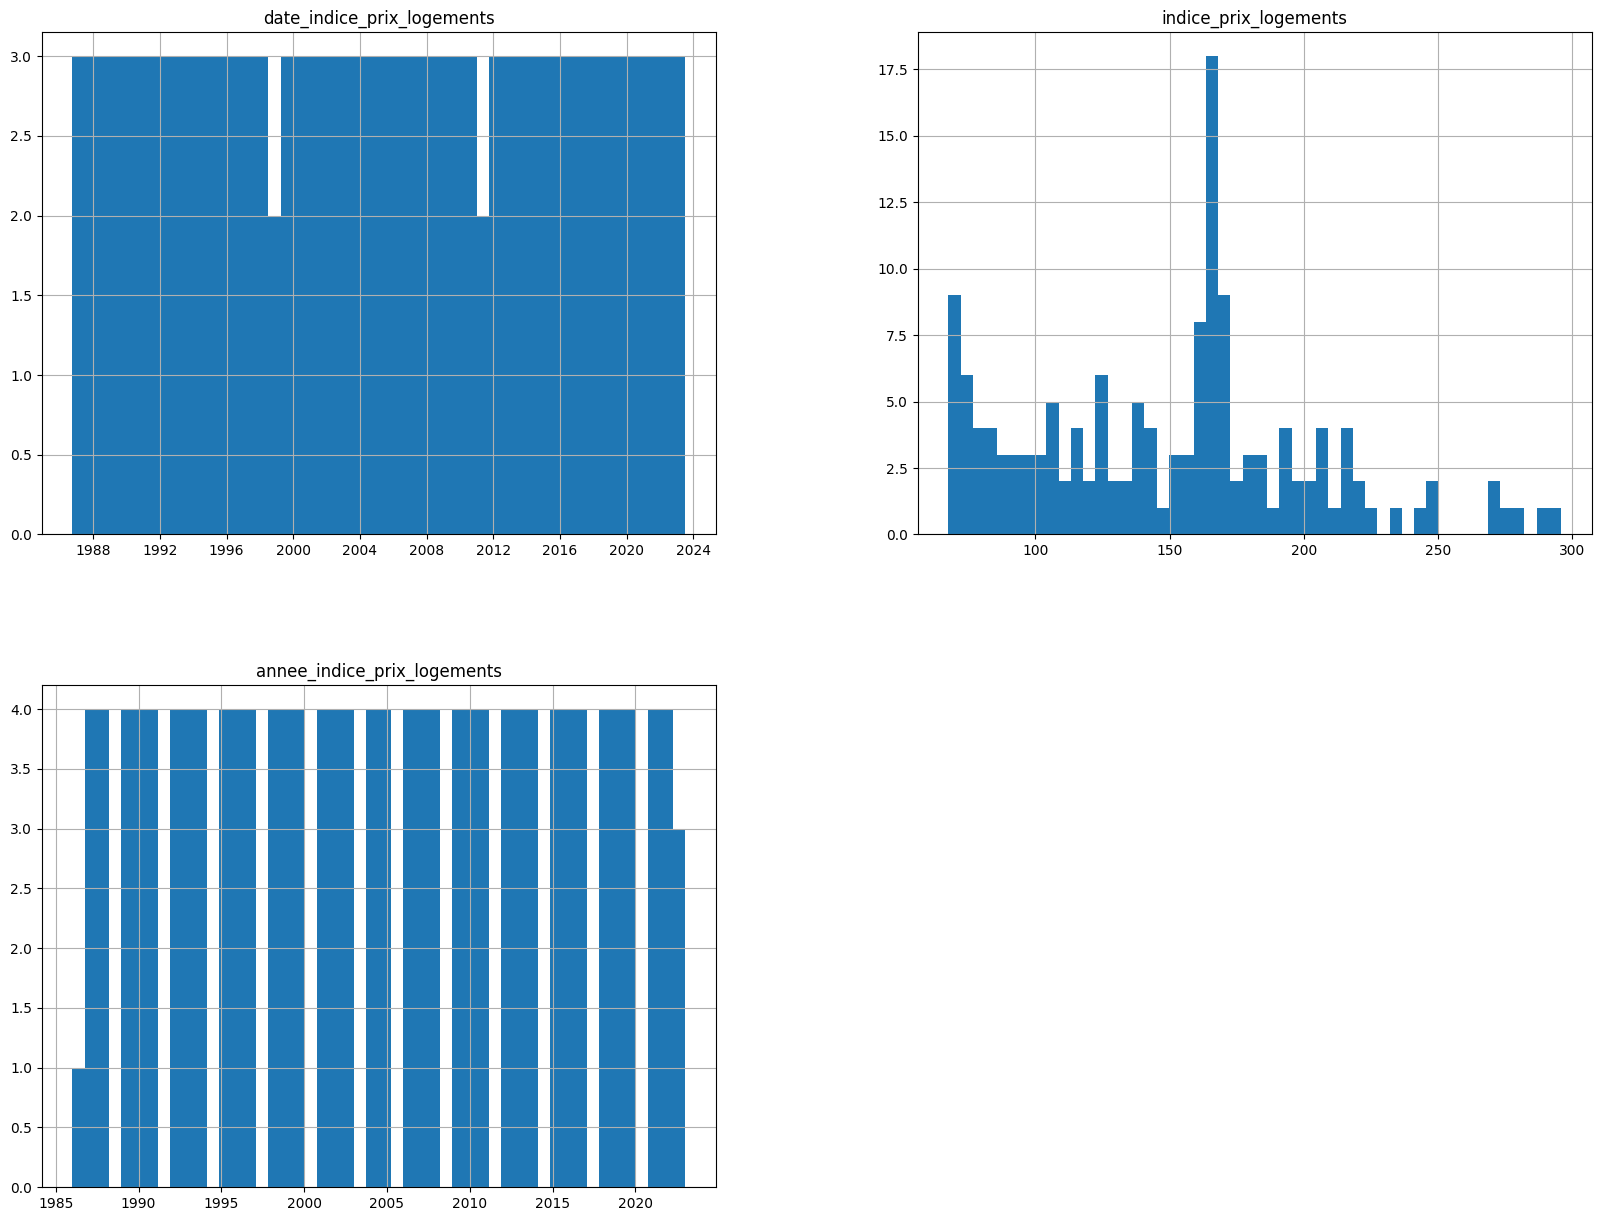

In [ ]:
# Répartition des variables
data_indice_prix_logements.hist(bins=50, figsize=(20,15))
plt.show()

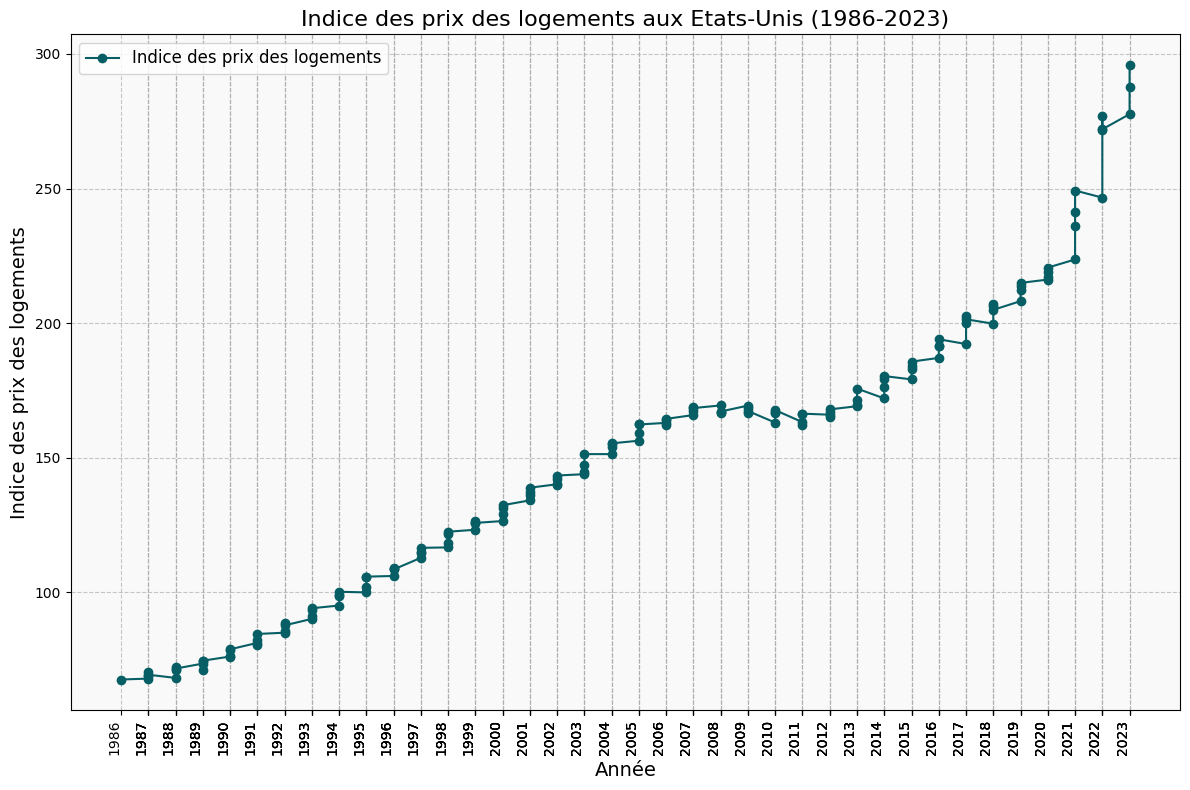

In [ ]:
# Création du graphique
plt.figure(figsize=(12, 8))
plt.plot(data_indice_prix_logements['annee_indice_prix_logements'], data_indice_prix_logements['indice_prix_logements'], marker='o', linestyle='-',
         color='#075F65', label='Indice des prix des logements')

plt.xlabel('Année', fontsize=14)
plt.ylabel('Indice des prix des logements', fontsize=14)
plt.title('Indice des prix des logements aux Etats-Unis (1986-2023)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.xticks(data_indice_prix_logements['annee_indice_prix_logements'], rotation=90, ha='right')

plt.tight_layout()
plt.show()

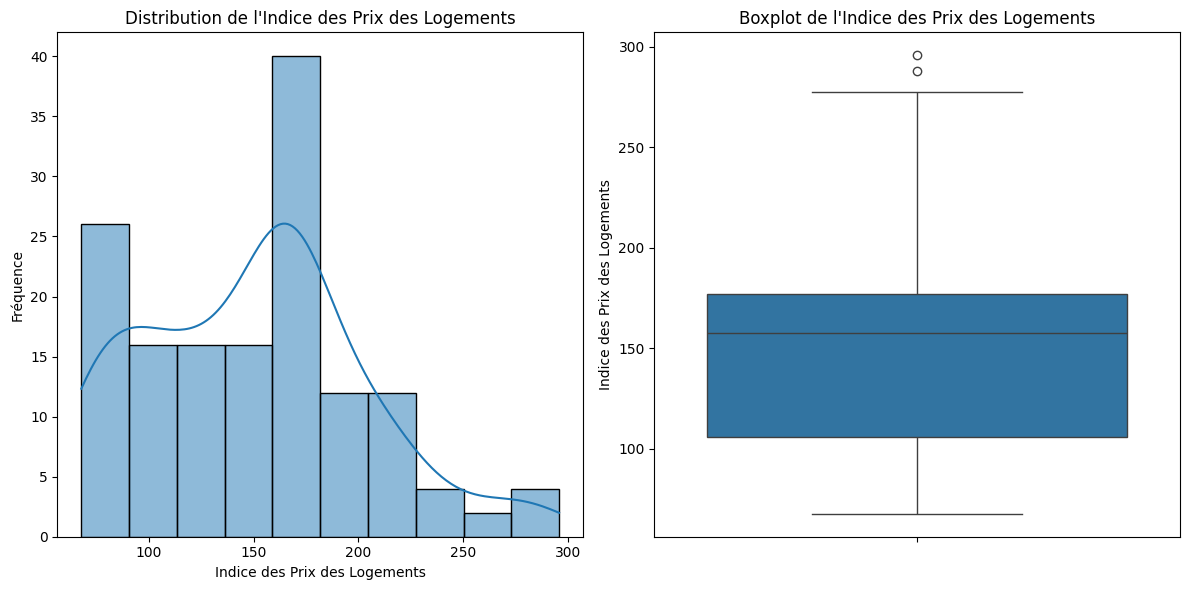

In [ ]:
# Création de sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogramme
sns.histplot(data_indice_prix_logements['indice_prix_logements'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Distribution de l\'Indice des Prix des Logements')
axs[0].set_xlabel('Indice des Prix des Logements')
axs[0].set_ylabel('Fréquence')

# Boxplot
sns.boxplot(y=data_indice_prix_logements['indice_prix_logements'], ax=axs[1])
axs[1].set_title('Boxplot de l\'Indice des Prix des Logements')
axs[1].set_ylabel('Indice des Prix des Logements')

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

# Affichage
plt.show()

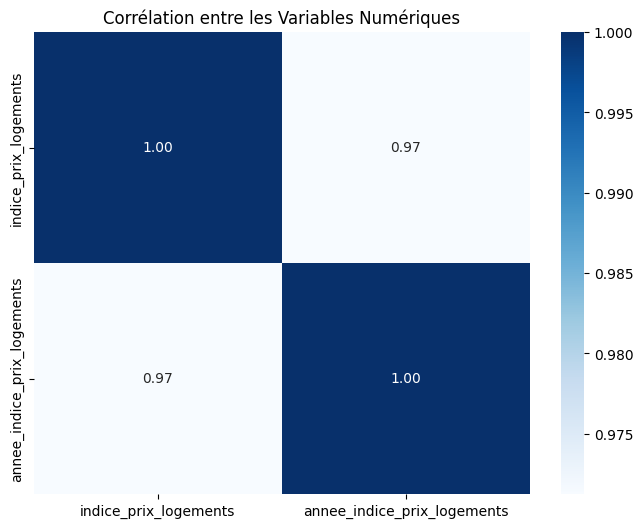

In [ ]:
# Calcul de la corrélation
corr = data_indice_prix_logements[['indice_prix_logements',	'annee_indice_prix_logements']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Corrélation entre les Variables Numériques')
plt.show()

In [ ]:
data_indice_prix_logements.head(20)

,date_indice_prix_logements,indice_prix_logements,annee_indice_prix_logements
0,1986-10-01,67.65,1986
1,1987-01-01,67.98,1987
2,1987-04-01,70.50,1987
3,1987-07-01,68.95,1987
4,1987-10-01,69.43,1987
5,1988-01-01,68.23,1988
6,1988-04-01,72.22,1988
7,1988-07-01,71.32,1988
8,1988-10-01,71.70,1988
9,1989-01-01,73.57,1989


In [ ]:
# Convertir la colonne 'date_indice_prix_logements' en type datetime si ce n'est pas déjà le cas
data_indice_prix_logements['date_indice_prix_logements'] = pd.to_datetime(data_indice_prix_logements['date_indice_prix_logements'])

# Grouper les données par année et calculer la moyenne de l'indice des prix des logements pour chaque année
data_grouped = data_indice_prix_logements.groupby(data_indice_prix_logements['date_indice_prix_logements'].dt.year)['indice_prix_logements'].mean().reset_index()

# Renommer les colonnes
data_grouped.columns = ['annee_indice_prix_logements', 'moyenne_indice_prix_logements']

# Afficher le résultat
print(data_grouped)

    annee_indice_prix_logements  moyenne_indice_prix_logements
0                          1986                      67.650000
1                          1987                      69.215000
2                          1988                      70.867500
3                          1989                      73.485000
4                          1990                      77.577500
5                          1991                      82.072500
6                          1992                      86.777500
7                          1993                      92.190000
8                          1994                      98.265000
9                          1995                     103.340000
10                         1996                     108.057500
11                         1997                     114.725000
12                         1998                     119.780000
13                         1999                     125.335000
14                         2000                     129

### 2.3.3 - Concatenation des 2 dataframes <a class="anchor"  id="sd_dext3"></a>

In [ ]:
df6 = pd.merge(df5, data_grouped, left_on='anneeVente', right_on='annee_indice_prix_logements', how='left')
df6.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite,annee_indice_prix_logements,moyenne_indice_prix_logements
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2.8527,-0.37,2007,2007-12-31,387.4317,300.1962,471.7739,2007,2007,167.6625
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,3.2259,-0.17,2006,2006-12-31,279.7815,285.7397,479.3354,2006,2006,163.4250
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975


In [ ]:
df6.shape

(2903, 92)

In [ ]:
# Vérifier la coherence en affichant les premières lignes des colonnes anneeConstruction et anneeVente et les nouvelles colonnes
df6[['anneeConstruction', 'anneeVente', 'annee_indice_prix_logements', 'moyenne_indice_prix_logements']].head(100)

,anneeConstruction,anneeVente,annee_indice_prix_logements,moyenne_indice_prix_logements
0,2003,2008,2008,167.5975
1,1976,2007,2007,167.6625
2,2001,2008,2008,167.5975
3,1915,2006,2006,163.4250
4,2000,2008,2008,167.5975
...,...,...,...,...
95,1993,2009,2009,167.9225
96,1999,2006,2006,163.4250
97,1965,2007,2007,167.6625
98,1920,2010,2010,166.1300


In [ ]:
# Exportation de la base de données obtenue après suppréssion de valeurs manquantes et aberrantes
df6.to_csv('data_etape_0203.csv', index = False)

## 2.4 - Données Externes 4 : Latitude et longitude des quartiers <a class="anchor"  id="coordonnée"></a>
-----------------

In [ ]:
df7 = pd.read_csv('data_etape_0203.csv')
df7.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,taux_inflation,changement_annuel_taux_inflation,annee_taux_inflation,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite,annee_indice_prix_logements,moyenne_indice_prix_logements
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2.8527,-0.37,2007,2007-12-31,387.4317,300.1962,471.7739,2007,2007,167.6625
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,3.2259,-0.17,2006,2006-12-31,279.7815,285.7397,479.3354,2006,2006,163.4250
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,3.8391,0.99,2008,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975


In [ ]:
# Créer un dictionnaire avec les informations sur les quartiers
quartiers_info = {

    "NAmes"	  :		{"Latitude" : 	42.03344461056188	  , "Longitude" : 	-93.6324105222854	  },
    "CollgCr"	:		{"Latitude" : 	42.022234536585565	, "Longitude" : 	-93.6517065649376	  },
    "OldTown"	:		{"Latitude" : 	43.31349599143381	  , "Longitude" : 	-95.14410804264548	},
    "Edwards"	:		{"Latitude" : 	41.05817196135305	  , "Longitude" : 	-92.42061613737812	},
    "Somerst"	:		{"Latitude" : 	42.05147116800214	  , "Longitude" : 	-93.64495042989307	},
    "Gilbert"	:		{"Latitude" : 	42.10673828802636	  , "Longitude" : 	-93.64970782361709	},
    "Sawyer"	:		{"Latitude" : 	40.69662226615848	  , "Longitude" : 	-91.35459374622498	},
    "NridgHt"	:		{"Latitude" : 	42.059828930297805	, "Longitude" : 	-93.64963223549479	},
    "NWAmes"	:		{"Latitude" : 	42.0462744726601	  , "Longitude" : 	-93.66290853948183	},
    "SawyerW"	:		{"Latitude" : 	40.705565728274664	, "Longitude" : 	-91.4093598448185	  },
    "BrkSide"	:		{"Latitude" : 	42.02860525428564	  , "Longitude" : 	-93.63044987597965	},
    "Crawfor"	:		{"Latitude" : 	42.02800106252608	  , "Longitude" : 	-93.60712917413362	},
    "Mitchel"	:		{"Latitude" : 	43.32034163171231	  , "Longitude" : 	-92.8722657423409	  },
    "NoRidge"	:		{"Latitude" : 	42.04793340295536	  , "Longitude" : 	-93.64802984529771	},
    "IDOTRR"	:		{"Latitude" : 	42.00954136946634	  , "Longitude" : 	-93.55969070172078	},
    "Timber"	:		{"Latitude" : 	41.99989155196018	  , "Longitude" : 	-93.64966934529956	},
    "ClearCr"	:		{"Latitude" : 	42.036000116934304	, "Longitude" : 	-93.64852973747072	},
    "SWISU"	  :		{"Latitude" : 	42.026665240967446	, "Longitude" : 	-93.64620483976043	},
    "StoneBr"	:		{"Latitude" : 	42.059702874449364	, "Longitude" : 	-93.63768501830816	},
    "MeadowV"	:		{"Latitude" : 	41.354190940836986	, "Longitude" : 	-93.58808611483393	},
    "Blmngtn"	:		{"Latitude" : 	42.05650619723149	  , "Longitude" : 	-93.6351934876271	  },
    "BrDale"	:		{"Latitude" : 	42.05290103512409	  , "Longitude" : 	-93.62881347413267	},
    "Veenker"	:		{"Latitude" : 	42.04180709605563	  , "Longitude" : 	-93.6490898164628	  },
    "NPkVill"	:		{"Latitude" : 	42.02861154422856	  , "Longitude" : 	-93.64991073180393	},
    "Blueste"	:		{"Latitude" : 	42.010585362936666	, "Longitude" : 	-93.64481611646397	}
}

# Créer un DataFrame à partir du dictionnaire
df8 = pd.DataFrame(quartiers_info).T.reset_index()
df8.columns = ['Quartier', 'Latitude', 'Longitude']

# Ajouter une colonne de concaténation des coordonnées
df8['Coordonnées'] = df8['Latitude'].astype(str) + ', ' + df8['Longitude'].astype(str)

# Afficher le DataFrame
df8.head()

,Quartier,Latitude,Longitude,Coordonnées
0,NAmes,42.033445,-93.632411,"42.03344461056188, -93.6324105222854"
1,CollgCr,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
2,OldTown,43.313496,-95.144108,"43.31349599143381, -95.14410804264548"
3,Edwards,41.058172,-92.420616,"41.05817196135305, -92.42061613737812"
4,Somerst,42.051471,-93.644950,"42.05147116800214, -93.64495042989307"


In [ ]:
df8.dtypes

Quartier        object
Latitude       float64
Longitude      float64
Coordonnées     object
dtype: object

### 2.4.3 - Concatenation des 2 dataframes <a class="anchor"  id="sd_dext4"></a>

In [ ]:
df9 = pd.merge(df7, df8, left_on='quartier', right_on='Quartier', how='left')
df9.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite,annee_indice_prix_logements,moyenne_indice_prix_logements,Quartier,Latitude,Longitude,Coordonnées
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,313.1278,288.1213,458.6142,2008,2008,167.5975,CollgCr,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,387.4317,300.1962,471.7739,2007,2007,167.6625,Veenker,42.041807,-93.649090,"42.04180709605563, -93.6490898164628"
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,313.1278,288.1213,458.6142,2008,2008,167.5975,CollgCr,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,279.7815,285.7397,479.3354,2006,2006,163.4250,Crawfor,42.028001,-93.607129,"42.02800106252608, -93.60712917413362"
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,313.1278,288.1213,458.6142,2008,2008,167.5975,NoRidge,42.047933,-93.648030,"42.04793340295536, -93.64802984529771"


In [ ]:
# Vérifier la coherence en affichant les premières lignes
df9[['quartier', 'Quartier']].head(100)

,quartier,Quartier
0,CollgCr,CollgCr
1,Veenker,Veenker
2,CollgCr,CollgCr
3,Crawfor,Crawfor
4,NoRidge,NoRidge
...,...,...
95,Gilbert,Gilbert
96,CollgCr,CollgCr
97,Edwards,Edwards
98,Edwards,Edwards


In [ ]:
# Supprimer la colonne "Quartier"
df9.drop(columns=['Quartier'], inplace=True)

# Afficher le DataFrame après suppression de la colonne
df9.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,date_taux_criminalite,ames_taux_criminalite,iowa_taux_criminalite,etatsunis_taux_criminalite,annee_taux_criminalite,annee_indice_prix_logements,moyenne_indice_prix_logements,Latitude,Longitude,Coordonnées
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,2007-12-31,387.4317,300.1962,471.7739,2007,2007,167.6625,42.041807,-93.649090,"42.04180709605563, -93.6490898164628"
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.022235,-93.651707,"42.022234536585565, -93.6517065649376"
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,2006-12-31,279.7815,285.7397,479.3354,2006,2006,163.4250,42.028001,-93.607129,"42.02800106252608, -93.60712917413362"
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,2008-12-31,313.1278,288.1213,458.6142,2008,2008,167.5975,42.047933,-93.648030,"42.04793340295536, -93.64802984529771"


In [ ]:
df9.shape

(2903, 95)

In [ ]:
# Exportation de la base de données obtenue après suppréssion de valeurs manquantes et aberrantes
df9.to_csv('data_etape2.csv', index = False)

In [ ]:
#Le nombre de données manquantes
VM = df9.isnull().sum()
VM2=VM[VM > 0]
VM2

prix    1459
dtype: int64